In [1]:
import selenium
from selenium import webdriver
import pandas as pd
import time
from bs4 import BeautifulSoup
import requests


In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,ElementNotInteractableException,ElementClickInterceptedException

In [15]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/icg/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


In [101]:
#!pip install Google-Images-Search

### Q1. Write a python program which searches all the product under a particular product from www.amazon.in. The product name to be searched will be taken as input from user. 

### Q2. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. 

In [5]:
from selenium import webdriver
import time
import requests
import shutil
import os
from webdriver_manager.chrome import ChromeDriverManager

#Install driver
opts=webdriver.ChromeOptions()
opts.headless=True

driver = webdriver.Chrome(ChromeDriverManager().install() ,options=opts)


inp = input("Enter what you wanna search?")
urlweb = "https://www.amazon.in/s?k=" +str(inp)+ "&ref=nb_sb_noss"

user = os.getlogin()
driver.get(urlweb)
time.sleep(3)
BrandName=[]
Ratings=[]
No_Of_Ratings=[]
Price=[]
Other_info=[]
Delivery=[]
return_Info=[]
NameOfProduct=[]
URLS=[]

for page in range(0,3):
    
    urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    url=[]
    for i in urls:
        url.append(i.get_attribute('href'))
    for j in url:
        driver.get(j)
        #scraping the product URL
        URLS.append(j)
        try:   
            #scraping Brand and Name of product
            title=driver.find_element_by_xpath("//span[@class='a-size-large product-title-word-break']")
            p=title.text.split(' ')
            BrandName.append(p[0])
            NameOfProduct.append(p[1:])
        except NoSuchElementException   as e:
            BrandName.append("Not given")#appending the No rating if no rating is there   
            
            #scraping price
        try:
            price=driver.find_element_by_xpath("//*[@id='priceblock_ourprice_row']/td[2]/span")
            Price.append(price.text)
        except NoSuchElementException as e:
            Price.append("Not mentioned ")
                
            #scraping ratings
        try:
            rate=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")#locating the ratingd link
            rate.click()                                                      #click the rating link found
            rating=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")#locating the rating
            Ratings.append(rating.text)#appending the ratings in Ratings list
        except NoSuchElementException as d:
            Ratings.append("No rating")
        
        
            #scraping the expected delivery
        try:
            delivery=driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']/b")
            Delivery.append(delivery.text)
        except NoSuchElementException as e:
            Delivery.append("No time")
            
            #Scraping No of ratings given
        try:
            no_of_rating=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")
            No_Of_Ratings.append(no_of_rating.text)
        except NoSuchElementException as e:
            No_Of_Ratings.append("Not rated yet")
            
            #scraping the return/exchange option
        try:
            return_info=driver.find_element_by_xpath("//div[@id='RETURNS_POLICY']/span/div[2]/a")#locating the ratingd link
            return_Info.append(return_info.text)
        except NoSuchElementException as e :
            return_Info.append("Info Missing")
            
    
    
    try:
        nxt_button=driver.find_element_by_xpath("//li[@class='a-last']/a")
        if nxt_button.text=="Next":
            nxt_button.click()
            time.sleep(5)
    except NoSuchElementException as e:
        pass

    
#creating a dataframe
products=pd.DataFrame({
"Brandname":BrandName[:20],
"NameOfProduct":NameOfProduct[:20],
"Ratings":Ratings[:20],
"No_Of_Ratings":No_Of_Ratings[:20],
"Price":Price[:20],
"Expected Delivery":Delivery[:20],
"return_Info":return_Info[:20],
"Product URL":URLS[:20]})
#printing dataframe
products   



[WDM] - ====== WebDriver manager ======


[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/icg/.wdm/drivers/chromedriver/mac64/90.0.4430.24]


Enter what you wanna search?laptop


,Brandname,NameOfProduct,Ratings,No_Of_Ratings,Price,Expected Delivery,return_Info,Product URL
0,(Renewed),"[Dell, Vostro, 5481, 14-inch, Laptop, (Core, i...",No rating,Not rated yet,"₹ 44,990.00","Thursday, April 29",7 Days Replacement,https://www.amazon.in/gp/slredirect/picassoRed...
1,DELL,"[Latitude, DEL3400-2, 14-inch, Laptop, (8th, G...",1 out of 5,1 rating,"₹ 60,999.00","Wednesday, April 28",7 Days Replacement,https://www.amazon.in/gp/slredirect/picassoRed...
2,HP,"[15, Intel, Pentium, Gold, 6405U, Processor, E...",3.6 out of 5,172 ratings,"₹ 26,599.00","Tuesday, April 27",7 Days Replacement,https://www.amazon.in/HP-Pentium-Processor-15-...
3,AVITA,"[Essential, NE14A2INC433-MB, 14-inch, Laptop, ...",3.9 out of 5,473 ratings,Not mentioned,"Tuesday, April 27",7 Days Replacement,https://www.amazon.in/AVITA-Essential-NE14A2IN...
4,HP,"[15, Entry, Level, 15.6-inch, HD, Laptop, (AMD...",3.9 out of 5,447 ratings,"₹ 23,990.00",April 26 - 29,7 Days Replacement,https://www.amazon.in/HP-15-6-inch-Laptop-Wind...
5,Lenovo,"[Ideapad, Slim, 3, AMD, Athlon, Silver, 3050U,...",3.7 out of 5,299 ratings,"₹ 31,400.00","Wednesday, April 28",7 Days Replacement,https://www.amazon.in/Lenovo-Ideapad-Windows-P...
6,HP,"[Chromebook, 14a-na0003TU, 14-inch, Thin, &, L...",3.7 out of 5,185 ratings,"₹ 24,990.00","Tuesday, April 27",7 Days Replacement,https://www.amazon.in/HP-Chromebook-14a-na0003...
7,Lenovo,"[IdeaPad, Slim, 3, Intel, Celeron, N4020, 15.6...",4 out of 5,113 ratings,"₹ 28,990.00","Saturday, May 1",7 Days Replacement,https://www.amazon.in/Lenovo-IdeaPad-15-6-inch...
8,HP,"[15, Thin, &, Light, Ryzen, 3-3250, Laptop,, 4...",3.2 out of 5,154 ratings,"₹ 31,999.00","Tuesday, April 27",7 Days Replacement,https://www.amazon.in/HP-db1060au-Laptop-Ryzen...
9,Lenovo,"[V15, Intel, Core, i5, 10th, Gen, 15-inch, Ful...",3.8 out of 5,75 ratings,Not mentioned,"Wednesday, April 28",7 Days Replacement,https://www.amazon.in/Lenovo-15-inch-Laptop-Wi...


## Q 3.  Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/icg/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


Current Path /Users/icg/Documents/Cars
Found: 100 search results. Extracting links from0:100
Found: 1 looking for more image links ...
Found: 2 looking for more image links ...
Found: 3 looking for more image links ...
Found: 4 looking for more image links ...
Found: 5 looking for more image links ...
Found: 5 looking for more image links ...
Found: 6 looking for more image links ...
Message: element click intercepted: Element  is not clickable at point (205, 557). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 390px;">...</div>
  (Session info: headless chrome=89.0.4389.128)

Found: 6 looking for more image links ...
Found: 7 looking for more image links ...
Found: 7 looking for more image links ...
Found: 8 looking for more image links ...
Found: 9 looking for more image links ...
Found: 10 looking for more image links ...
Found: 11 looking for more image links ...
Found: 12 looking for more image links ...
Found: 12 looking for more image link
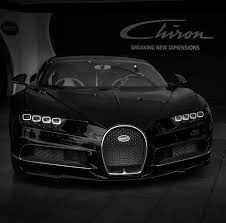

/Users/icg/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SAVED - https://www.diabete.qc.ca/wp-content/uploads/2014/08/Les-fruits-768x768.png - AT: /Users/icg/Documents/Fruits/                                                                                                                                                    29.jpg
SAVED - https://7esl.com/wp-content/uploads/2017/12/fruit.jpg - AT: /Users/icg/Documents/Fruits/                                                                                                                                                    30.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGHJT8q-l4tpC1yJh-mnZTLpp1feWPFNBJ2g&usqp=CAU - AT: /Users/icg/Documents/Fruits/                                                                                                                                                    31.jpg
SAVED - https://cdn.cliqueinc.com/posts/281986/fruits-that-are-high-in-sugar-281986-1566362117724-main.700x0c.jpg - AT: /Users/icg/Documents/Fruits/                               

In [74]:
from selenium import webdriver
import time
import requests
import shutil
import os
from PIL import Image
import io
from webdriver_manager.chrome import ChromeDriverManager

#Install driver
opts=webdriver.ChromeOptions()
opts.headless=True

driver = webdriver.Chrome(ChromeDriverManager().install() ,options=opts)
img_urls=set()
img_cars=[]
img_fruits=[]
img_mLearning=[]
#iterate =3
images=pd.DataFrame({})


        
def getImageUrls(name,totalImgs,driver):
    
    search_url = 'https://www.google.com/search?q={q}&tbm=isch&sxsrf=ALeKk016Vg2RcgPEsahLg2IMiOdQJGJ-PA%3A1618509391827&source=hp&biw=895&bih=661&ei=T354YJy_MO6C4-EPt4WVIA&oq=cars&gs_lcp=CgNpbWcQAzICCAAyBQgAELEDMgIIADICCAAyBQgAELEDMgUIABCxAzICCAAyBQgAELEDMgIIADICCAA6BwgjEOoCECc6CAgAELEDEIMBOgQIIxAnULmK_iFYuI3-IWCdmP4haAFwAHgAgAGBAYgB8wOSAQMwLjSYAQCgAQGqAQtnd3Mtd2l6LWltZ7ABCg&sclient=img&ved=0ahUKEwjcovSq6YDwAhVuwTgGHbdCBQQQ4dUDCAc&uact=5'
    driver.get(search_url.format(q=name))
    img_urls = set()
    img_count = 0
    results_start = 0  
    
    while(img_count<totalImgs): #Extract actual images now
        
        #scroll_to_end(driver)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
        thumbnail_results = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
        totalResults=len(thumbnail_results)
        print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")
        
        for img in thumbnail_results[results_start:totalResults]:
            try:
                img.click()
                time.sleep(2)
                actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
                for actual_image in actual_images:
                    if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                        img_urls.add(actual_image.get_attribute('src'))
            except ElementClickInterceptedException or ElementNotInteractableException as err:
                print(err)
            img_count=len(img_urls)
            
            if img_count >= totalImgs:
                print(f"Found: {img_count} image links")
                break
            else:
                print("Found:", img_count, "looking for more image links ...")                
                load_more_button = driver.find_element_by_css_selector(".mye4qd")
                driver.execute_script("document.querySelector('.mye4qd').click();")
                results_start = len(thumbnail_results)
    return img_urls

def downloadImages(folder_path,file_name,url):
    try:
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
       
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")
        

def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)

        if totalLinks is None:
            print('images not found for :',name)
            continue
        else:
            for i, link in enumerate(totalLinks):
                file_name = f"{i:150}.jpg"
                downloadImages(path,file_name,link)
                
                
list1=["Cars","Fruits","machine learning"]
destDir='/Users/icg/Documents'
totalImgs=100

saveInDestFolder(list1,destDir,totalImgs,driver)


### Q4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”.

In [57]:
from selenium import webdriver
import time
import requests
import shutil
import os
from webdriver_manager.chrome import ChromeDriverManager

#Install driver
opts=webdriver.ChromeOptions()
opts.headless=True

driver = webdriver.Chrome(ChromeDriverManager().install(),options=opts)


url="https://www.flipkart.com/"

try:
    search_sunglasses=driver.find_element_by_xpath("//input[@class='_3704LK']")
    search_sunglasses.send_keys("iphone11 phone")   
    search_button=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/button")
    search_button.click()
    
except NoSuchElementException:
    pass

time.sleep(3)
BrandName=[]
SmartphoneName=[]
Color=[]
RAM=[]
ROM=[]
Primary_camera=[]
Secondary_camera=[]
Display_Size=[]
Resoltion=[]
Processor=[]
Processor_core=[]
battery=[]
URLS=[]
Price=[]

try:
    
    url=("https://www.flipkart.com/search?q=iphone11%20phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")
    driver.get(url)
except NoSuchElementException as e:
    pass
try:
    urls=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
    url=[]
    for i in urls:
        url.append(i.get_attribute('href'))
    for j in url:
        driver.get(j)
        #scraping the product URL
        URLS.append(j)
        try:   
            #scraping Brand and Name of product
            title=driver.find_elements_by_xpath("//span[@class='B_NuCI']")
            for i in title:
                p=i.text.split('(')
                name=p[0].split(' ')
                BrandName.append(name[0])
                SmartphoneName.append(name[1:])
                r=p[1].split(',')
                col=r[0] #scraping color of phone
                rom=r[1:] # scraping ROM
                Color.append(col)
                ROM.append(rom)
   
        except NoSuchElementException   as e:
            BrandName.append("Info Missing")
            
            #scraping price
        try:
            price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
            for i in price:
                if i is not None:
                    Price.append(i.text)
                else: 
                    Price.append("Price missing")
        except NoSuchElementException as e:
            Price.append("Not mentioned ")
            
        try: # scraping display
            display=driver.find_elements_by_xpath("//*[@id='container']/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[2]")
            for i in display:
                if i is not None:
                    disp=i.text.split(')')
                    Display_Size.append(disp[0])
                    Resoltion.append(disp[1])
                else: 
                    Display.append("data missing")
        except NoSuchElementException as e:
            Resoltion.append("Not mentioned ")    
            
        try: # scraping front and back camera
            camera=driver.find_elements_by_xpath("//*[@id='container']/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[3]")
            for i in camera:
                if i is not None:
                    cam=i.text.split(' | ')
                    Primary_camera.append(cam[0])
                    sec=cam[1].split(' ')
                    Secondary_camera.append(sec[0])
                else: 
                    Primary_camera.append("Info Missing")
                    Secondary_camera.appendend("data missing")
        except NoSuchElementException as e:
            Primary_camera.append("Not mentioned ")  
            Secondary_camera.append("Data Missing")
                
        try: #scraping processor
            processor=driver.find_elements_by_xpath("//*[@id='container']/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]")
            for i in processor:
                if i is not None:
                    Processor.append(i.text)
                else: 
                    Processor.append("data missing")
        except NoSuchElementException as e:
            Processor.append("Not mentioned ")
            
except NoSuchElementException as s:
    print(s)
    
#creating a dataframe
products=pd.DataFrame({
"Brandname":BrandName[:20],
"SmartPhone Name":SmartphoneName[:20],
"Color":Color[:20],
"ROM":ROM[:20],    
"Price":Price[:20],
"Primary Camera":Primary_camera[:20],
"Front Camera":Secondary_camera[:20],
"Display Size":Display_Size[:20],
"Resolution":Resoltion[:20],
"Processor":Processor[:20],
"Product URL":URLS[:20]
})
#printing dataframe
products   



[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430


[WDM] - Driver [/Users/icg/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


,Brandname,SmartPhone Name,Color,ROM,Price,Primary Camera,Front Camera,Display Size,Resolution,Processor,Product URL
0,APPLE,"[iPhone, 11, ]",Black,[ 64 GB)],"₹46,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-black...
1,APPLE,"[iPhone, 11, ]",White,[ 64 GB)],"₹51,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-white...
2,APPLE,"[iPhone, 11, ]",Purple,[ 64 GB)],"₹51,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-purpl...
3,APPLE,"[iPhone, 11, ]",Red,[ 64 GB)],"₹46,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-red-6...
4,APPLE,"[iPhone, 11, ]",Black,[ 128 GB)],"₹56,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-black...
5,APPLE,"[iPhone, 11, ]",Green,[ 64 GB)],"₹51,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-green...
6,APPLE,"[iPhone, 11, Pro, ]",Midnight Green,[ 64 GB)],"₹79,999",12MP + 12MP + 12MP,12MP,14.73 cm (5.8 inch,Super Retina XDR Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-pro-m...
7,Apple,"[iPhone, 11, ]",Green,[ 64 GB) ],"₹51,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-green...
8,Apple,"[iPhone, 11, ]",Black,[ 128 GB) ],"₹56,999",12MP + 12MP,12MP,15.49 cm (6.1 inch,Liquid Retina HD Display,A13 Bionic Chip Processor,https://www.flipkart.com/apple-iphone-11-black...
9,APPLE,"[iPhone, 6, ]",Gold,[ 32 GB)],"₹30,780",8MP Rear Camera,1.2MP,11.94 cm (4.7 inch,Retina HD Display,A8 Chip with 64-bit Architecture and M8 Motion...,https://www.flipkart.com/apple-iphone-6-gold-3...


## Q5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [8]:
#!pip install folium

In [9]:
import folium

In [11]:
%%HTML
<style>.dataframe th{background: rgb(63,87,124);background: linear-gradient(180deg, rgba(63,87,124,1) 0%, rgba(101,124,161,1) 100%, rgba(0,212,255,1) 100%);;
padding: 10px;font-family: monospace;font-size: 110%;color: white;border:1px dashed white;text-align:left !important;
-moz-border-radius: 3x;-webkit-border-radius: 3px;}.dataframe thead{border:none; !important;}</style>

In [41]:
from selenium import webdriver
import time
import requests
import shutil
import os
from webdriver_manager.chrome import ChromeDriverManager

option = webdriver.ChromeOptions()
option.headless=True
prefs = {'profile.default_content_setting_values': {'images':2, 'javascript':2}}
option.add_experimental_option('prefs', prefs)

driver = webdriver.Chrome(ChromeDriverManager().install(), options=option)

url='https://www.google.com/maps/search/delhi'
driver.get(url)
Url_With_Coordinates=driver.find_element_by_xpath("//meta[@itemprop='image']").get_attribute('content')

driver.close()

import csv

with open('Url_With_Coordinates.csv', 'w') as file:
    wr = csv.writer(file)
    wr.writerow(Url_With_Coordinates)
    
lat=Url_With_Coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')[0]
long=Url_With_Coordinates.split('?center=')[1].split('&zoom=')[0].split('%2C')[1]
print("Geospatial Coordinates of Delhi City are :-->\n" )
print("Latitude -->" , lat,'\n')
print("Longitude -->",long,'\n')

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430


[WDM] - Driver [/Users/icg/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


Geospatial Coordinates of Delhi City are :-->

Latitude --> 28.6469655 

Longitude --> 77.0932634 



## Q6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [67]:
from selenium import webdriver
import time
import requests
import shutil
import os
from webdriver_manager.chrome import ChromeDriverManager

option = webdriver.ChromeOptions()
option.headless=True
driver = webdriver.Chrome(ChromeDriverManager().install(), options=option)

url="https://trak.in/india-startup-funding-investment-2015/"
driver.get(url)

time.sleep(3)
Date=[]
StartUpName=[]
Industry=[]
Sub_Vertical=[]
City=[]
Investor_Name=[]
Investment_Type=[]
Amount=[]

try:
    try:  
        
        #scraping date of the deal
        try:
            date1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[2]")
            date2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[2]")
            date3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[2]")
            date1.extend(date2)
            date1.extend(date3)
            for i in date1:
                Date.append(i.text)
        except NoSuchElementException   as e:
            Date.append("Info Missing")
            
            #scraping Startup name
        try:
            startname1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[3]")
            startname2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[3]")
            startname3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[3]")
            startname1.extend(startname2)
            startname1.extend(startname3)
            for i in startname1:
                StartUpName.append(i.text)
        except NoSuchElementException as e:
            StartUpName.append("Not mentioned ")
            
        try: # scraping industry/vertical
            industry1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[4]")
            industry2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[4]")
            industry3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[4]")
            industry1.extend(industry2)
            industry1.extend(industry3)
            for i in industry1:
                Industry.append(i.text)
               
        except NoSuchElementException as e:
            Industry.append("Not mentioned ")    
            
        try: # scraping sub-vertical
            sub1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[5]")
            sub2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[5]")
            sub3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[5]")
            sub1.extend(sub2)
            sub1.extend(sub3)
            for i in sub1:
                Sub_Vertical.append(i.text)
        except NoSuchElementException as e:
            Sub_Vertical.append("Not mentioned ")  
                
        try: #scraping city
            city1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[6]")
            city2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[6]")
            city3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[6]")
            city1.extend(city2)
            city1.extend(city3)
            for i in city1:
                City.append(i.text)
        except NoSuchElementException as e:
            City.append("Not mentioned ")
            
        try: #scraping Investor name
            investor1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[7]")
            investor2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[7]")
            investor3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[7]")
            investor1.extend(investor2)
            investor1.extend(investor3)
            for i in investor1:
                Investor_Name.append(i.text)
        except NoSuchElementException as e:
            Investor_Name.append("Not mentioned ")
            
        try: #scraping Investment Type
            investtype1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[8]")
            investtype2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[8]")
            investtype3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[8]")
            investtype1.extend(investtype2)
            investtype1.extend(investtype3)
            for i in investtype1:
                Investment_Type.append(i.text)
        except NoSuchElementException as e:
            Investtype.append("Not mentioned ") 
            
        try: #scraping Amount
            amt1=driver.find_elements_by_xpath("//*[@id='tablepress-50']/tbody/tr/td[9]")
            amt2=driver.find_elements_by_xpath("//*[@id='tablepress-49']/tbody/tr/td[9]")
            amt3=driver.find_elements_by_xpath("//*[@id='tablepress-48']/tbody/tr/td[9]")
            amt1.extend(amt2)
            amt1.extend(amt3)
            for i in amt1:
                Amount.append(i.text)
        except NoSuchElementException as e:
            Amount.append("Not mentioned ")      
     
    except NoSuchElementException as a:
        print(a)
except NoSuchElementException as s:
    print(s)
    
#creating a dataframe
deals=pd.DataFrame({
"Date":Date,
"StartUpName":StartUpName,
"Industry":Industry,
"Sub-Vertical":Sub_Vertical,    
"City":City,
"Investor_Name":Investor_Name,
"Investment_Type":Investment_Type,
"Amount":Amount
})

#printing dataframe
deals   
     

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430


[WDM] - Driver [/Users/icg/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


,Date,StartUpName,Industry,Sub-Vertical,City,Investor_Name,Investment_Type,Amount
0,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


## Q7. Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [73]:
from selenium import webdriver
import time
import requests
import shutil
import os
from webdriver_manager.chrome import ChromeDriverManager

option = webdriver.ChromeOptions()
option.headless=True
driver = webdriver.Chrome(ChromeDriverManager().install(), options=option)

url="https://www.digit.in/top-products/best-gaming-laptops-40.html"
driver.get(url)

time.sleep(3)
Productname=[]
Seller=[]
Price=[]


try:
        #scraping productname
    try:
        product=driver.find_elements_by_xpath("//*[@id='summtable']/tbody/tr/td[1]")
        
        for i in product:
            Productname.append(i.text)
    except NoSuchElementException   as e:
        Productname.append("Info Missing")
        
    #scraping Seller
    try:
        seller=driver.find_elements_by_xpath("//*[@id='summtable']/tbody/tr/td[2]")
        
        for i in product:
            Seller.append(i.text)
    except NoSuchElementException   as e:
        Seller.append("Info Missing")    
            
    #scraping Price
    try:
        price=driver.find_elements_by_xpath("//*[@id='summtable']/tbody/tr/td[3]")
        
        for i in price:
            Price.append(i.text)
    except NoSuchElementException   as e:
        Price.append("Info Missing")    
            
except NoSuchElementException as e:
    print(e)
    
#creating a dataframe
laptops=pd.DataFrame({
"Productname":Productname,
"Seller":Seller,
"Price":Price})

#printing dataframe
laptops   
         

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430


[WDM] - Driver [/Users/icg/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


,Productname,Seller,Price
0,MSI GT76 TITAN DT 9SG,MSI GT76 TITAN DT 9SG,₹379990
1,Alienware 17 Area-51m,Alienware 17 Area-51m,₹422000
2,HP Omen 15 2020,HP Omen 15 2020,₹117790
3,Asus Zephyrus G14,Asus Zephyrus G14,₹164990
4,Lenovo Legion Y540,Lenovo Legion Y540,₹79990
5,Asus ROG Zephyrus G GA502,Asus ROG Zephyrus G GA502,₹79990
6,Asus ROG Zephyrus S GX531,Asus ROG Zephyrus S GX531,₹239990
7,MSI GT83VR 7RE Titan SLI,MSI GT83VR 7RE Titan SLI,₹349990
8,ASUS ROG ZEPHYRUS DUO 15,ASUS ROG ZEPHYRUS DUO 15,₹244990
9,Dell G3,Dell G3,₹61990
